In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib

In [3]:
%matplotlib inline

In [4]:
matplotlib.rcParams["font.size"] = 16

In [5]:
# if we invested $1000 in 1970, how would it have turned out?
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [6]:
starting = 1000
df["mult"] = df["return"].cumprod()
df["wealth"] = starting * df["mult"]
df = df.set_index("year")
df.head()

,return,mult,wealth
year,,,
1970,1.0401,1.040100,1040.100000
1971,1.1431,1.188938,1188.938310
1972,1.1898,1.414599,1414.598801
1973,0.8534,1.207219,1207.218617
1974,0.7353,0.887668,887.667849


Text(0, 0.5, 'Wealth ($)')

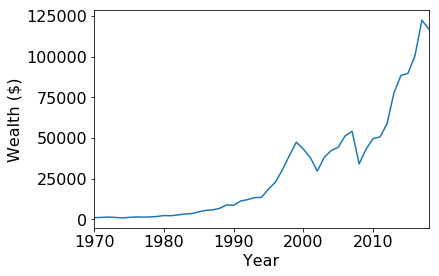

In [7]:
ax = df["wealth"].plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Wealth ($)")

In [8]:
# how risky is investing in the S&P 500?
# approach: do many simulations
# in each sim, randomly choose historical years to replay

In [9]:
import random

In [10]:
random.choices([1, 2, 10], k=10)

[1, 1, 1, 1, 1, 10, 10, 2, 2, 10]

In [11]:
# Series for one outcome
def run_sim(starting=1000, years=10):
    rand_returns = random.choices(list(df["return"]), k=years)
    rand_returns = Series(rand_returns)
    return rand_returns.cumprod() * starting

# DataFrame with many outcomes, each in a column
def run_mult_sims(sims=10):
    sims_df = DataFrame()
    for i in range(sims):
        sims_df["sim"+str(i)] = run_sim()
    return sims_df
    
sims = run_mult_sims(250)
#sims.plot.line(legend=False) # detective: what usually happens

In [12]:
sims.head()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
0,1372.000000,1062.700000,1143.100000,1052.500000,735.300000,1013.200000,1372.000000,955.700000,1166.100000,950.800000,...,1189.800000,1157.900000,735.300000,1160.000000,1040.100000,1021.100000,1372.000000,735.300000,1218.300000,1021.100000
1,1687.011200,781.403310,720.153000,1354.357000,946.184040,940.452240,1559.826800,1106.605030,1283.642880,599.004000,...,1446.201900,1524.838510,647.872830,1343.164000,1430.969580,1088.084160,1591.520000,809.418240,1285.184670,1085.122970
2,1062.817056,1075.054674,684.721472,1548.165487,998.129544,1189.295903,1717.057341,1313.208189,808.695014,440.447641,...,1761.907775,1809.525860,615.997487,1445.513097,1602.113542,1325.612932,1358.203168,862.516077,1352.656865,1194.503365
3,1399.623781,1359.514141,654.388311,1645.235463,953.912405,1236.986668,1922.417399,1330.542537,991.136610,587.380974,...,2298.761074,1882.087847,718.314669,1858.640740,1456.321209,1577.214267,1461.698249,1109.023171,994.608593,1260.081600
4,1473.104030,1377.459727,797.241280,1726.016524,1159.480528,1697.145709,2637.556672,1551.545653,772.095419,698.865883,...,2661.735447,2419.988553,666.739676,2113.088657,1929.625603,1507.343675,1681.830006,1169.908543,1153.745968,1169.607741


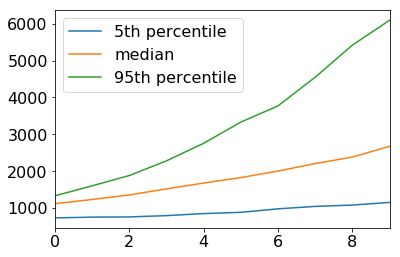

In [13]:
# for percentile, use .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis=1),
    "median": sims.quantile(0.5, axis=1),
    "95th percentile": sims.quantile(0.95, axis=1),
}).plot.line()

In [14]:
df = pd.read_csv("Fire_Hydrants.csv")
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

In [15]:
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [16]:
colors = df["nozzle_color"]
colors = colors.str.upper()
colors.head(2)

0    BLUE
1    BLUE
Name: nozzle_color, dtype: object

In [17]:
counts = colors.value_counts() # like GROUP BY and COUNT(*) in SQL
counts.head(3)

BLUE      7003
GREEN      330
ORANGE      79
Name: nozzle_color, dtype: int64

Text(0, 0.5, '# of Hydrants')

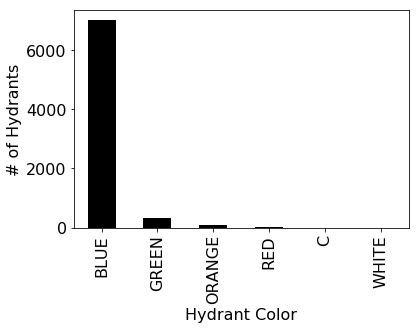

In [18]:
ax = counts.plot.bar(color="k")
ax.set_xlabel("Hydrant Color")
ax.set_ylabel("# of Hydrants")

In [19]:
counts = df["Style"].str.upper().value_counts() # like GROUP BY w/ COUNT(*)
top12 = counts.iloc[:12]
top12["other"] = counts.iloc[12:].sum()
top12

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
CENTURIAN           35
EDDY                27
other              167
Name: Style, dtype: int64

Text(0.5, 0, 'Hydrant Count')

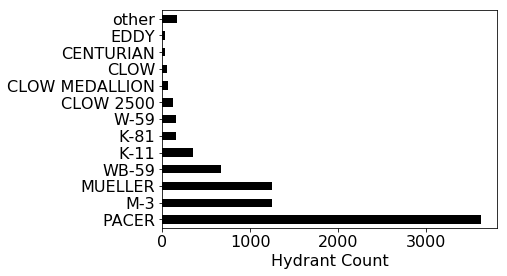

In [20]:
ax = top12.plot.barh(color="k")
ax.set_xlabel("Hydrant Count")

In [21]:
# when (which decade) were all the pacers manufactured?

In [22]:
df[["Style", "year_manufactured"]].head()

,Style,year_manufactured
0,Pacer,1996.0
1,Pacer,1995.0
2,Pacer,1996.0
3,Pacer,1995.0
4,Pacer,1996.0


In [23]:
pacer_years = df["year_manufactured"][df["Style"] == "Pacer"]
other_years = df["year_manufactured"][df["Style"] != "Pacer"]
pacer_decades = (pacer_years // 10 * 10).dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
other_decades = (other_years // 10 * 10).dropna()
other_decades = other_decades.astype(int).value_counts()

Text(0, 0.5, 'Hydrant Count')

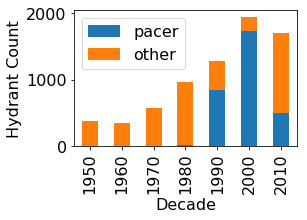

In [29]:
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True, figsize=(4,2.5))
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")